# <center><u style="color: orange;">Projet Analyse de données</u></center>
#### <center><u> (DE JESUS Dylan & QUACH Kevin) </u></center>
### <center>Université Gustave Eiffel 2022-2023 M1 Informatique</center>

## Table des matières


    
  * [I - Introduction](#Intro)
  * [II - Partie 1 - Exploration de la dataset (Visualisation des données)](#Partie1)
      - [A - Observations initiales](#Partie1ObservationInit)
      - [B - Sexe](#Partie1Sexe)
      - [C - Age](#Partie1Age)
      - [D - Gravité](#Partie1Grav)
      - [E - Transformation de la base de données](#Partie1Transfo)
  * [III - Partie 2 - Approche par modèle simple de classification](#Partie2)
      - [A - Modèle des plus proches voisins](#Partie2MPPV)
      - [B - Modèle linéaire de classification](#Partie2MLC)
      - [C - Modèle d'arbres de décision](#Partie2MAD)
      - [D - Modèle Gaussian Process](#Partie2MGP)
      - [E - Modèle de vote](#Partie2MV)
      - [F - Etude des résultats](#Partie2EtudRes)
  * [IV - Partie 3 - Approche par modèle neuronal de classification](#Partie3)
      - [A - Modèle neuronal naif](#Partie3MNN)
      - [B - Amélioration du modèle simple](#Partie3AMS)
      - [C - Résolution du problème et amélioration du modèle avancé](#Partie3RPAMA)
      - [D - Etude des résultats](#Partie3EtudRes)
  * [V - Conclusion](#Conclusion)


## <center><u style="color: #fd6e0b;">Introduction <a name="Intro"></a></u></center>

<center> Nous avons choisis la base de données recensant les accidents qui se sont produits en 2021. <center>

    
L'objectif de ce projet d'Analyse de données est la réflexion, la conception et l'implantation en langage python d'un modèle de classification sur notre jeu de données permettant de prédire la gravité d'un accident selon les données que l'on peut donner (équipements, place de la personne accidentée, ...) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf

print("Version pandas:", pd.__version__)
print("Version numpy :", np.__version__)
print("Version matplotlib :", matplotlib.__version__)
print("Version tensorflow :", tf.__version__)

Version pandas: 1.4.4
Version numpy : 1.22.3
Version matplotlib : 3.5.2
Version tensorflow : 2.9.1


In [2]:
df_accident = pd.read_csv("base_accidents_2021_short.csv") #Création du dataframe via les données du fichier correspondant à la base

## <center><u style="color: #fd6e0b;">Partie 1 - Exploration de la dataset (Visualisation des données) <a name="Partie1"></a></u></center>

Avant de débuter la partie abordant les différents modèles, nous commençon par faire une exploration sur le jeu de données afin de mieux la comprendre et définir certaines tendances.

In [3]:
df_accident # Affichage du dataframe

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,...,prof,plan,surf,infra,situ,lat,long,hrmn,jour,grav
0,1,1,1,1,0,9,-1,0,1,2000.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,3
1,1,1,1,1,0,9,-1,0,7,2000.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,3
2,1,1,1,1,1,-1,-1,0,1,1978.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,1
3,1,1,1,1,1,-1,-1,0,7,1978.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,1
4,1,1,1,0,1,-1,-1,0,7,1983.0,...,1,1,1,0,1,49.242129,4.554546,14:20,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248056,1,1,1,0,0,-1,-1,0,7,1999.0,...,1,2,2,5,3,44.954275,-0.517921,10:55,1,3
248057,1,1,1,3,1,0,-1,-1,7,1968.0,...,1,1,2,0,1,48.796670,2.050500,18:00,2,3
248058,1,1,1,3,1,0,-1,-1,7,1968.0,...,1,1,2,0,1,48.796670,2.050500,18:00,2,3
248059,1,1,1,3,1,0,-1,-1,7,1985.0,...,1,1,2,0,1,48.796670,2.050500,18:00,2,3


### A - Observations initiales <a name="Partie1ObservationInit"></a>
* La dataset base_accidents_2021_short contient 248061 observations de dimensions 34.
* On observe qu'il est possible de mettre jusqu'à 3 équipements de sécurités differents pour chaque accidents.
* Chaque observation contient les données pour un usager.

On a des observations sur:  
* la localisation avec la longitude et latitude.
* la temporalité de l'accident (heures, jour, mois).
* l'usager (catégorie (conducteur, passager, piéton) , sexe, année de naissance, place dans le véhicule)
* l'accident (motif du déplacement, localisation du piéton, catégorie du véhicule, nombre d'occupant dans le véhicule, l'obstacle, le point de chox sur le véhicule, ...)  


In [3]:
df_accident.columns # Toutes les données référencées dans la base

Index(['place', 'catu', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'catv', 'an_nais', 'mois', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'lum', 'agg', 'int', 'atm', 'col', 'catr', 'circ', 'vosp', 'prof',
       'plan', 'surf', 'infra', 'situ', 'lat', 'long', 'hrmn', 'jour', 'grav'],
      dtype='object')

Nous pouvons donc voir quelles colonnes font partie de notre jeu de données. On y retrouve les informations quant à la gravité d'un accident, l'année de naissance de la personne touchée par l'accident recensé, les équipements de sécurités portés...

In [4]:
df_accident.describe() # Affichage des statistiques

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,...,vosp,prof,plan,surf,infra,situ,lat,long,jour,grav
count,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000,242344.000000,...,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000,248061.000000
mean,1.740209,1.258819,1.261436,3.098665,1.799948,0.972289,-0.929844,-0.407287,12.203248,1983.108177,...,0.197617,1.226412,1.263008,1.255328,0.734916,1.362931,44.378698,2.423211,15.807346,2.454271
std,2.049270,0.521419,0.575457,2.792421,2.156082,3.012579,0.810214,0.963075,12.902967,18.214851,...,0.652446,0.538136,0.644205,0.787078,2.046532,1.268594,11.948310,18.647185,8.792455,1.399131
min,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1912.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-23.395090,-178.085795,1.000000,-1.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,7.000000,1971.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,44.543420,1.419219,8.000000,1.000000
50%,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,-1.000000,-1.000000,7.000000,1986.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,47.752670,2.404078,16.000000,3.000000
75%,1.000000,1.000000,2.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,10.000000,1998.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,48.858019,4.838890,23.000000,4.000000
max,10.000000,3.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,2021.000000,...,3.000000,4.000000,4.000000,9.000000,9.000000,8.000000,51.057332,168.106549,31.000000,4.000000


### B - Sexe  <a name="Partie1Sexe"></a>

En moyenne, il y a plus d'hommes impliqués dans un accident que de femmes. En effet au regard de la documentation de la base de données nous voyons que les hommes sont marqués avec la valeur 1 tandis qu'une femme est considérée comme ayant la valeur 2.

S'il y avait plus de femmes que d'hommes la moyenne serait supérieure à 1.5.



In [5]:
df_accident["sexe"].groupby(df_accident["catu"]).value_counts()

catu  sexe
1      1      139044
       2       49034
      -1        5708
2      2       22324
       1       22023
3      1        5018
       2        4910
Name: sexe, dtype: int64

Il y a plus d'accidents avec des hommes au volant que ceux avec des femmes.  
Le nombre d'hommes et de femmes impliqués dans des accidents en tant que passager et piétons sont dans le même ordre de grandeur.

### C - Age  <a name="Partie1Age"></a>

In [6]:
# On augmente le display.max_rows pour afficher toutes les rows pour les dates de naissances.
pd.set_option('display.max_rows', df_accident.shape[0]+1)
print(df_accident.groupby(df_accident["an_nais"]).describe()['place']['count'].sort_values(ascending = False))
pd.set_option('display.max_rows', 5)

an_nais
2000.0    7688.0
2001.0    7306.0
1999.0    7204.0
2002.0    6696.0
1998.0    6672.0
1997.0    6101.0
1996.0    6074.0
1995.0    5846.0
1993.0    5623.0
1994.0    5527.0
1992.0    5360.0
1991.0    5277.0
1990.0    5188.0
1989.0    5024.0
1988.0    4853.0
2003.0    4703.0
1987.0    4700.0
1986.0    4486.0
1985.0    4480.0
1984.0    4209.0
1980.0    4163.0
1982.0    4135.0
1983.0    4067.0
1981.0    3826.0
1972.0    3699.0
1973.0    3662.0
1979.0    3635.0
2004.0    3629.0
1977.0    3568.0
1978.0    3551.0
1974.0    3520.0
1975.0    3471.0
1970.0    3454.0
1971.0    3385.0
1976.0    3357.0
1968.0    3227.0
1969.0    3149.0
1967.0    3143.0
2005.0    3044.0
1966.0    3012.0
1965.0    2987.0
1964.0    2966.0
1963.0    2665.0
1962.0    2621.0
1961.0    2596.0
1960.0    2233.0
2006.0    2165.0
1959.0    2011.0
1958.0    1885.0
1957.0    1693.0
1955.0    1527.0
1956.0    1502.0
1954.0    1471.0
1952.0    1367.0
2007.0    1346.0
1953.0    1337.0
1951.0    1277.0
1949.0    1255.0
1950.0

array([[<AxesSubplot:title={'center':'an_nais'}>]], dtype=object)

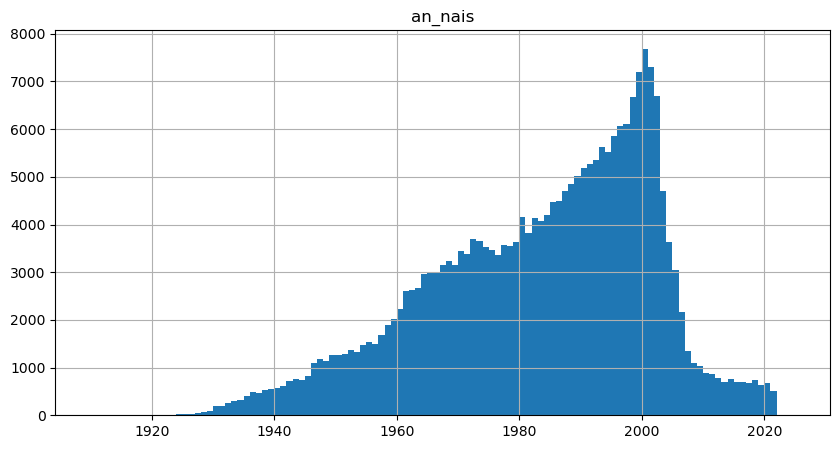

In [7]:
df_accident.hist(column = 'an_nais', bins = 115, figsize = (10, 5), range = [1910, 2025])

On observe qu'il y a un pic dans le nombre d'accidents chez les jeunes conducteurs.

### D - Gravité <a name="Partie1Grav"></a>

In [9]:
df_accident['grav'].unique() 

array([ 3,  1,  4,  2, -1])

Il existe donc 5 valeurs possibles pour la colonne "gravité". Cependant nous remarquons que l'une des valeurs -1 signifie en fait que la donnée n'a pas pu être recensée.

L'étude des corrélations entre les données comme les équipements de sécurité par rapport à la gravité de l'accident n'a pas aboutit car les valeurs de ces colonnes sont des classificateurs.

In [10]:
len(df_accident['place'].unique())

11

In [4]:
df_accident['place'].unique()

array([ 1, 10,  4,  2,  8,  3,  7,  9,  5,  6, -1])

On constate que les accidents impliquent des usagers situés n'importe où dans le véhicule lors de l'accident. En effet la documentation de la base de données nous indique qu'il existe 10 places, de 1 à 3 pour un side-car, 1 à 9 dans le cas de voitures/transports en commun.
La valeur 10 représente elle les piétons.

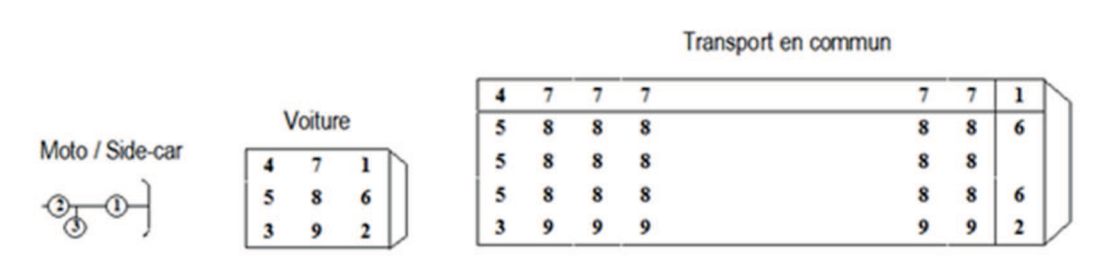

On remarque également que certains accidents ne référencent pas la place qu'occupait l'usager lors de l'accident. (Il existe des lignes possèdant la valeur -1 dans la colonne 'place')

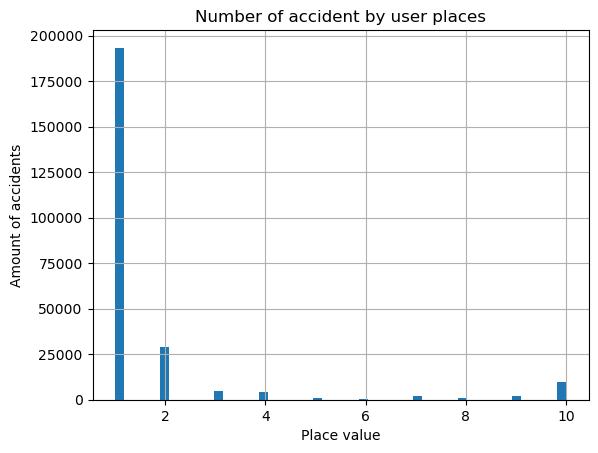

In [5]:
df_accident.hist(column = 'place', bins = 50, range=[1, 10]) # On exclue les valeurs non renseignées et on compte les piétons

plt.title("Number of accident by user places")
plt.ylabel("Amount of accidents")
plt.xlabel("Place value")

plt.show()

On remarque une très nette différence de présence entre la place dont la valeur est 1 et les autres. Or d'après le schéma de la documentation sur le valeur des places on remarque que quelque soit le véhicule la place 1 représente la place du conducteur.

In [145]:
def percentages(dataframe, column):
    """
    Calculate the percentages of the frequences of values found for a column in a dataframe.
    :param dataframe: dataframe in which we want to take the observations.
    :type dataframe: pd.DataFrame
    :param column: column of the dataframe we want to make a frequence analysis.
    :type column: string
    :return: a list of tuples with the format : (value_of_dataframe, percentage).
    """
    dico = {}
    result = []
    nbObs = 0
    for obs in dataframe[column]:
        if obs not in dico:
            dico[obs] = 0
        else:
            dico[obs] = dico[obs] + 1
        nbObs += 1
    for key in dico:
        percentage = 100 * (dico[key]/nbObs)
        result.append((key, percentage))
    return result

percentages(df_accident, 'place')

[(1, 63.96780303030303),
 (4, 3.2670454545454546),
 (8, 4.024621212121212),
 (10, 7.386363636363637),
 (2, 6.865530303030303),
 (3, 3.3143939393939394),
 (7, 4.403409090909091),
 (9, 2.556818181818182),
 (5, 2.9356060606060606),
 (6, 0.8049242424242424)]

On remarque qu'il y a 78% des accidents recensé dans la base de données qui impliquent le conducteur du véhicule.

La deuxième place dans le véhicule la plus dangereuse (avec 11% de récurrence dans la base) est la place 2. Cela peut s'expliquer par le fait que cette place à l'avant côté droit est connue statistiquement comme étant la "place de la mort" d'après certaines études.

Au contraire la place numéro 6 est la place renseignée(donc on retire la place -1) la moins représentée, on peut interprété ce constat comme le fait qu'aucun side-car ne possède cette place, et la plupart des modèles de voitures ne possèdent pas de place numéro 6 (place centrale à l'avant). De plus dans la catégorie des transports en commun les bus ne possèdent pas de place assise à cet endroit donc également moins de présence à cette place dans les bus.

In [14]:
percentages(df_accident, 'grav')

[(3, 12.69486134458863),
 (1, 45.877828437360165),
 (4, 39.364511148467514),
 (2, 2.0212770246028198),
 (-1, 0.03950641172937302)]

En calculant les différents pourcentages de fréquence de gravité pour chaque observation on observe 2 états de gravité qui prédominent :

- Valeur 1 avec 46 %


- Valeur 4 avec 39 %


La **valeur 1** représente un état indemme

La **valeur 4** représente un état de blessure légère


On remarque également que le pourcentage de tués, représenté par la valeur 2 est extrêmement bas (2%) par rapport à la fréquence des valeurs 1 et 4

### E - Transformation de la base de données  <a name="Partie1Transfo"></a>




In [230]:
df_accident = df_accident.dropna() # On retire toutes les cases ne possèdant pas de référence
df_accident['hrmn'] = df_accident['hrmn'].map(lambda string: -1) #On transforme toutes les valeurs de date en même entier afin de ne pas avoir de soucis
#dans les données lors de la création des jeux de données et tests


## <center><u style= "color: #fd6e0b;">Partie 2 - Approche par modèle simple de classification <a name="Partie2"></a></u></center>

In [16]:
from scipy.spatial import distance_matrix

list_columns = [column for column in df_accident.columns if column != 'grav'] #Colonnes qui serviront pour les données

x_train, x_test, y_train, y_test = train_test_split(df_accident[list_columns], df_accident['grav'])

#Transformation de nos données en np.array contenant des valeurs entières
x_train = np.asarray(x_train).astype('int')
x_test = np.asarray(x_test).astype('int')
y_train = np.asarray(y_train).astype('int')
y_test = np.asarray(y_test).astype('int')

### A - Modèle du plus proche voisin <a name="Partie2MPPV"></a>

In [17]:
def classifieur_plus_proche_voisin(x_test, k, x_train, y_train):
    """
    :param x_test: une liste d'observations sur lesquelles ont va faire des prédictions. 
    :param k: hyper-paramètre du modèle, le nombre de voisin à considérer
    :param x_train: le jeu de données de référence. 
    :param y_train: les labels correspondants
    
    :return: une liste y_pred de la même longueur que new_obs, qui indique pour chaque observation
             de new_obs le label prédit par votre méthode. 
    """
    k_dist_min = np.argsort(distance_matrix(x_test ,x_train), axis = 1)[:, :k]
    # On choisis la classe la plus fréquente parmis les k voisins les plus proches
    y_pred = [np.bincount(y_train[i]).argmax() for i in k_dist_min]
    return y_pred

In [18]:
def accuracy(y_pred, y_test):
    good = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            good += 1
    return good / len(y_test) * 100

y_pred = classifieur_plus_proche_voisin(x_test, 1, x_train, y_train)
print("Accuracy :" +  str(accuracy(y_pred, y_train)))


Accuracy :13.952020202020202


On obtient une précision relativement basse pour la classification avec le modèle du plus proche voisin.
Cela pourrait s'expliquer par le fait que cette base de donnée contient un nombre trop élevé de données pour chaque observation.

### B - Modèle Linéaire de Classification <a name="Partie2MLC"></a>

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [20]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(solver="lbfgs", max_iter=1000, multi_class="multinomial"))
pipe.fit(x_train, y_train)
score = pipe.score(x_test, y_test)
predict = pipe.predict(x_test)
acc = accuracy(predict, y_test)

print("Score: " + str(score))
print("Accuracy: " + str(acc))

Score: 0.6590909090909091
Accuracy: 65.9090909090909


Ici, on choisit le modèle de solver lbfgs car ce modèle peut gérer plusieurs classes.  
On met le paramètre multi_class à multinomial car le problème que l'on cherche à résoudre est multinomial. Autrement dit, il y a plus de deux résultats possibles (il y en a 4). 

Avec le modèle linéaire de classification LogisticRegression, on obtient des prédictions avec une précision aux alentours de 62~65%.  
Ce n'est pas un très bon modèle...

### C - Modèle d'arbres de décision  <a name="Partie2MAD"></a>

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
clf1 = DecisionTreeClassifier (max_depth=None, min_samples_split=2, random_state=0, )
clf1.fit(x_train, y_train)
clf1.score(x_test, y_test)

0.6268939393939394

In [23]:
clf2 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, max_features=1.0)
clf2.fit(x_train, y_train)
clf2.score(x_test, y_test)

0.7159090909090909

In [24]:
clf3 = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, max_features=1.0)
clf3.fit(x_train, y_train)
clf3.score(x_test, y_test)

0.7159090909090909

On observe que parmis les modèles d'arbre de décision, le RandomForestClassifier est le plus performant avec 73-74% de précision.

### D - Modèle Gaussian Process <a name="Partie2MGP"></a>

In [25]:
from sklearn.gaussian_process import GaussianProcessClassifier

# Transformation de nos données en np.array
#X = np.asarray(df_accident[list_columns]).astype('int')
#y = np.asarray(df_accident['grav']).astype('int')
#gpc = GaussianProcessClassifier(random_state=0).fit(X, y)

gpc = GaussianProcessClassifier(random_state=0).fit(x_train, y_train)

In [26]:
# Liste des probabilités de chaque classe pour chaque observations 
probabilities = gpc.predict_proba(x_test)

# On récupère l'indice avec la plus grande probabilité pour chaque observation (+ 1 car les indices commencent à 0)
predict = [np.argmax(proba) + 1 for proba in probabilities]

accuracy(predict, y_test)

47.72727272727273

D'après la documentation, ce modèle n'est pas efficace pour des données de grande dimension (plus d'une dizaine). C'est le cas ici, ce qui expliquerait la mauvaise performance de ce modèle sur notre jeu de données.

### E - Modèle de vote <a name="Partie2MV"></a>

In [236]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

classifier1 = make_pipeline(StandardScaler(), LogisticRegression(solver="lbfgs", max_iter=1000, multi_class="multinomial"))
classifier2 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, max_features=1.0)
classifier3 = KNeighborsClassifier(n_neighbors = 5)

classifier = VotingClassifier(estimators=[('LogisticRegression', classifier1),
                                          ('RandomForestClassifier', classifier2),
                                          ('KneighborsClassifier', classifier3)
                                         ], voting="soft")

fits = [c.fit(x_train, y_train) for c in (classifier, 
                                                    classifier1, 
                                                    classifier2, 
                                                    classifier3)]

scores = [f.score(x_test, y_test) for f in fits]

In [28]:
print("Scores:")
print("VotingClassifier: " + str(scores[0]))
print("LogisticRegression: " + str(scores[1]))
print("RandomForestClassifier: " + str(scores[2]))
print("KneighborsClassifier: " + str(scores[3]))

Scores:
VotingClassifier: 0.7083333333333334
LogisticRegression: 0.6590909090909091
RandomForestClassifier: 0.7272727272727273
KneighborsClassifier: 0.5871212121212122


Le modèle de vote combine plusieurs classifieurs et fait des prédictions basées sur la moyenne des probabilités prédites (soft vote).  
Pour que ce classifieur soit performant, il faudrait avoir un ensemble de classifieur tous également performant les uns des autres. Ce qui n'est pas le cas ici car le RandomForestClassifier est plus performant que les deux autres.  



### F - Etude des résultats : <a name="Partie2EtudRes"></a>

Le meilleur modèle que nous avons pour l'instant est celui des RandomForestClassifier avec une précision de 70 à 75%. On peut supposer que la technique employée par le RandomForestClassifier: introduire un ensemble de classifieur avec un élément d'aléatoire lors de la construction, puis de faire la moyenne entre les prédictions des différents classifieurs, marche relativement bien avec notre jeu de données.  

Mais 75% est toujours un résultat relativement bas, on souhaite avoir un modèle qui puisse prédire la gravité des accidents avec encore plus de précision.  
On va alors se tourner sur des modèles de Deep Learning.

## <center><u style= "color: #fd6e0b;">Partie 3 - Approche par modèle neuronal de classification <a name="Partie3"></a></u></center>

Nous nous sommes alors tourné vers la conception d'un modèle de réseau de neurones adapté au cas d'un problème de classification.

### A - Modèle neuronal naif  <a name="Partie3MNN"></a>

In [64]:
#On crée les différents jeux
list_columns = [column for column in df_accident.columns if column != 'grav']

x_train, x_test, y_train, y_test = train_test_split(df_accident[list_columns], df_accident['grav'])

x_train = np.asarray(x_train).astype('int')
x_test = np.asarray(x_test).astype('int')

In [70]:
#Premier modèle neuronal très simple avec deux layers
# Utilisation de deux fonctions d'acitivations différentes
model_NN_class = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, 'sigmoid', input_shape = (len(df_accident.columns) - 1,)), #La taille de l'input est celle du nombre de colonnes en enlevant celle du label
    tf.keras.layers.Dense(5, 'softmax') # on doit prendre 5 car nos valeurs vont de 0 à 4
])

On a besoin de construire le dernier layer avec une dimension 5 car on veut que notre modèle puisse fournir 4 réponses différentes représentant les 4 possibilités de prédictions de gravité d'un accident. Comme le modèle prend dans l'intervalle [0, n[  nous prenons 5 pour avoir des valeurs possible de 0 à 4.

De plus utiliser l'activation "softmax" nous permet d'avoir une distribution des probabilités particulièrement apprécié dans le cas de la classification. Il est donc primordial que le dernier layer possède une activation en softmax.

In [66]:
#Compilation du modèle avec CrossEntropy et la donnée de l'accuracy
model_NN_class.compile(
    optimizer='adam', 
    loss='SparseCategoricalCrossentropy', 
    metrics=['accuracy']
)

On veut pouvoir récupérer une statistique abordant l'accuracy du modèle.

In [67]:
model_NN_class.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 10)                340       
                                                                 
 dense_103 (Dense)           (None, 5)                 55        
                                                                 
Total params: 395
Trainable params: 395
Non-trainable params: 0
_________________________________________________________________


Notre modèle possède donc 395 variables au total. On peut dire que c'est peu et déjà penser que ce ne sera pas suffisant pour avoir de bons résultats.

- Nous commençons par entraîner le modèle de neurones sur le jeu de données avec x_train la liste des différentes valeurs et y_train celle des labels correspondants que le modèle doit pouvoir prédire.

In [68]:
model_NN_class.fit(x_train, y_train, epochs=5, verbose=2)

Epoch 1/5
50/50 - 0s - loss: 1.1323 - accuracy: 0.4293 - 340ms/epoch - 7ms/step
Epoch 2/5
50/50 - 0s - loss: 1.0471 - accuracy: 0.4306 - 56ms/epoch - 1ms/step
Epoch 3/5
50/50 - 0s - loss: 1.0196 - accuracy: 0.4426 - 53ms/epoch - 1ms/step
Epoch 4/5
50/50 - 0s - loss: 1.0076 - accuracy: 0.4747 - 52ms/epoch - 1ms/step
Epoch 5/5
50/50 - 0s - loss: 1.0013 - accuracy: 0.4747 - 46ms/epoch - 916us/step


In [69]:
# Test des prédictions du modèle sur le jeu de données
accuracy = model_NN_class.evaluate(x_test, y_test, verbose=0)[1] * 100
print("L'accuracy pour ce modèle simple neuronal est de " + str(accuracy) + " %")

L'accuracy pour ce modèle simple neuronal est de 48.674243688583374 %


Nous avons un modèle qui n'est pas performant, ce modèle simple n'est donc pas suffisant pour garantir une prédiction un minimum fiable, on se tourne alors vers une amélioration de ce modèle.

Pour améliorer ce modèle on peut essayer d' :

- augmenter le nombre de layers de notre modèle neuronal.

- augmenter le nombre d'époch sur lequel entraîner notre modèle.

En effet complexifier notre modèle en passant par une augmentation du nombre de layers permettrait d'accroître considérablement le nombre de paramètres, d'être plus précis. De plus le nombre d'époch qui correspond au nombre d'itérations que fait le modèle sur le jeu donné peut nous aider à perfectionner le réseau neuronal actuel.

### B - Amélioration du modèle simple <a name="Partie3AMS"></a>

In [11]:
model_NN_class_updated = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, 'sigmoid', input_shape = (len(df_accident.columns) - 1,)),
    tf.keras.layers.Dense(100, 'sigmoid'),
    tf.keras.layers.Dense(50, 'sigmoid'),
    tf.keras.layers.Dense(5, 'softmax') # on doit prendre 5 car nos valeurs vont de 0 à 4
])

In [12]:
model_NN_class_updated.compile(
    optimizer='adam', 
    loss='SparseCategoricalCrossentropy', 
    metrics=['accuracy']
)

In [13]:
model_NN_class_updated.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               3400      
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 5)                 255       
                                                                 
Total params: 18,805
Trainable params: 18,805
Non-trainable params: 0
_________________________________________________________________


Nous avons désormais bien plus de paramètres dans notre modèle. 18 000 contre 400 pour le modèle simple.

In [14]:
model_NN_class_updated.fit(x_train, y_train, epochs=5, verbose=2)

Epoch 1/5
50/50 - 0s - loss: 1.0696 - accuracy: 0.4438 - 404ms/epoch - 8ms/step
Epoch 2/5
50/50 - 0s - loss: 1.0021 - accuracy: 0.4457 - 68ms/epoch - 1ms/step
Epoch 3/5
50/50 - 0s - loss: 0.9976 - accuracy: 0.4514 - 58ms/epoch - 1ms/step
Epoch 4/5
50/50 - 0s - loss: 0.9981 - accuracy: 0.4527 - 60ms/epoch - 1ms/step
Epoch 5/5
50/50 - 0s - loss: 0.9949 - accuracy: 0.4539 - 62ms/epoch - 1ms/step


In [15]:
model_NN_class_updated.fit(x_train, y_train, epochs=300, verbose=2)

Epoch 1/300
50/50 - 0s - loss: 0.9980 - accuracy: 0.4703 - 70ms/epoch - 1ms/step
Epoch 2/300
50/50 - 0s - loss: 0.9958 - accuracy: 0.4470 - 69ms/epoch - 1ms/step
Epoch 3/300
50/50 - 0s - loss: 0.9958 - accuracy: 0.4590 - 65ms/epoch - 1ms/step
Epoch 4/300
50/50 - 0s - loss: 0.9969 - accuracy: 0.4640 - 63ms/epoch - 1ms/step
Epoch 5/300
50/50 - 0s - loss: 0.9923 - accuracy: 0.4646 - 56ms/epoch - 1ms/step
Epoch 6/300
50/50 - 0s - loss: 0.9955 - accuracy: 0.4457 - 65ms/epoch - 1ms/step
Epoch 7/300
50/50 - 0s - loss: 0.9952 - accuracy: 0.4653 - 59ms/epoch - 1ms/step
Epoch 8/300
50/50 - 0s - loss: 0.9917 - accuracy: 0.4583 - 56ms/epoch - 1ms/step
Epoch 9/300
50/50 - 0s - loss: 0.9923 - accuracy: 0.4615 - 60ms/epoch - 1ms/step
Epoch 10/300
50/50 - 0s - loss: 0.9945 - accuracy: 0.4545 - 68ms/epoch - 1ms/step
Epoch 11/300
50/50 - 0s - loss: 0.9932 - accuracy: 0.4577 - 56ms/epoch - 1ms/step
Epoch 12/300
50/50 - 0s - loss: 0.9950 - accuracy: 0.4337 - 65ms/epoch - 1ms/step
Epoch 13/300
50/50 - 0s -

Epoch 101/300
50/50 - 0s - loss: 0.9908 - accuracy: 0.4672 - 69ms/epoch - 1ms/step
Epoch 102/300
50/50 - 0s - loss: 0.9907 - accuracy: 0.4754 - 67ms/epoch - 1ms/step
Epoch 103/300
50/50 - 0s - loss: 0.9904 - accuracy: 0.4646 - 67ms/epoch - 1ms/step
Epoch 104/300
50/50 - 0s - loss: 0.9912 - accuracy: 0.4678 - 64ms/epoch - 1ms/step
Epoch 105/300
50/50 - 0s - loss: 0.9916 - accuracy: 0.4665 - 67ms/epoch - 1ms/step
Epoch 106/300
50/50 - 0s - loss: 0.9900 - accuracy: 0.4754 - 62ms/epoch - 1ms/step
Epoch 107/300
50/50 - 0s - loss: 0.9913 - accuracy: 0.4558 - 62ms/epoch - 1ms/step
Epoch 108/300
50/50 - 0s - loss: 0.9910 - accuracy: 0.4754 - 60ms/epoch - 1ms/step
Epoch 109/300
50/50 - 0s - loss: 0.9912 - accuracy: 0.4545 - 61ms/epoch - 1ms/step
Epoch 110/300
50/50 - 0s - loss: 0.9903 - accuracy: 0.4754 - 62ms/epoch - 1ms/step
Epoch 111/300
50/50 - 0s - loss: 0.9897 - accuracy: 0.4754 - 58ms/epoch - 1ms/step
Epoch 112/300
50/50 - 0s - loss: 0.9903 - accuracy: 0.4754 - 61ms/epoch - 1ms/step
Epoc

Epoch 199/300
50/50 - 0s - loss: 0.9899 - accuracy: 0.4754 - 51ms/epoch - 1ms/step
Epoch 200/300
50/50 - 0s - loss: 0.9900 - accuracy: 0.4754 - 51ms/epoch - 1ms/step
Epoch 201/300
50/50 - 0s - loss: 0.9909 - accuracy: 0.4615 - 52ms/epoch - 1ms/step
Epoch 202/300
50/50 - 0s - loss: 0.9916 - accuracy: 0.4754 - 53ms/epoch - 1ms/step
Epoch 203/300
50/50 - 0s - loss: 0.9908 - accuracy: 0.4615 - 51ms/epoch - 1ms/step
Epoch 204/300
50/50 - 0s - loss: 0.9914 - accuracy: 0.4665 - 50ms/epoch - 992us/step
Epoch 205/300
50/50 - 0s - loss: 0.9891 - accuracy: 0.4729 - 49ms/epoch - 988us/step
Epoch 206/300
50/50 - 0s - loss: 0.9915 - accuracy: 0.4533 - 49ms/epoch - 975us/step
Epoch 207/300
50/50 - 0s - loss: 0.9910 - accuracy: 0.4545 - 51ms/epoch - 1ms/step
Epoch 208/300
50/50 - 0s - loss: 0.9902 - accuracy: 0.4602 - 51ms/epoch - 1ms/step
Epoch 209/300
50/50 - 0s - loss: 0.9907 - accuracy: 0.4754 - 51ms/epoch - 1ms/step
Epoch 210/300
50/50 - 0s - loss: 0.9903 - accuracy: 0.4754 - 53ms/epoch - 1ms/ste

50/50 - 0s - loss: 0.9899 - accuracy: 0.4653 - 48ms/epoch - 954us/step
Epoch 297/300
50/50 - 0s - loss: 0.9911 - accuracy: 0.4754 - 48ms/epoch - 964us/step
Epoch 298/300
50/50 - 0s - loss: 0.9908 - accuracy: 0.4754 - 49ms/epoch - 990us/step
Epoch 299/300
50/50 - 0s - loss: 0.9922 - accuracy: 0.4463 - 49ms/epoch - 982us/step
Epoch 300/300
50/50 - 0s - loss: 0.9899 - accuracy: 0.4703 - 49ms/epoch - 980us/step


Nous remarquons un résultat surprenant.

En effet l'entraînement d'un modèle plus complexe et amélioré sur lequel nous renforçons l'apprentissage donne une accuracy assez similaire au modèle simple.

In [16]:
accuracy = model_NN_class_updated.evaluate(x_test, y_test, verbose=0)[1] * 100
print("L'accuracy pour ce modèle avancé neuronal est de " + str(accuracy) + " %")

L'accuracy pour ce modèle avancé neuronal est de 42.23484992980957 %


Il nous faut donc comprendre pour quelle raison nous tombons sur les mêmes résultats avec un modèle naif et un modèle plus avancé.

Pour commencer on affiche les réponses données par le modèle sur les données du jeu de test (x_test) pour savoir ce que prédit notre réseau neuronal pour chaque tuple de données rencontrés. On utilise pour cela la fonction "prédict" de tensorflow et on affiche sous forme de liste :

In [273]:
np.argmax(model_NN_class_updated.predict(x_test), axis=1)

9/9 [==============================] - 0s 862us/step


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

On remarque que le modèle renvoie un unique résultat quelque soit les données observées. Nous pouvons donc en déduire que l'origine du problème de notre modèle est que celui-ci n'apprend jamais.


Enfaite, l'activation sigmoid est mauvaise ici, avec beaucoup de layers, la vitesse de convergence diminue.  
De plus sigmoïd cause des problèmes de disparition du gradient, ce qui empêche l'apprentissage du modèle.
Sigmoïd est aussi plus adapter à la classification binaire, ce qui n'est pas ce qu'on cherche à faire ici.   
L'activation sigmoid n'est donc pas adapter ici.  



### C - Résolution du problème et amélioration du modèle avancé <a name="Partie3RPAMA"></a>

On essaye encore une fois de l'améliorer. Cette fois on essaye l'activation elu (Exponential LU) sur nos layers.  
L'activation elu devrait donner des résultats plus précis et converger plus rapidement que relu.

In [287]:
model_NN_class_updated2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = 'elu', input_shape = (len(df_accident.columns) - 1,)),
    tf.keras.layers.Dense(100, activation = 'elu'),
    tf.keras.layers.Dense(50, activation = 'elu'),
    tf.keras.layers.Dense(250, activation = 'elu'),
    tf.keras.layers.Dense(180, activation = 'elu'),
    tf.keras.layers.Dense(120, activation = 'elu'),
    tf.keras.layers.Dense(5, 'softmax') # on doit prendre 5 car nos valeurs vont de 0 à 4
])

In [288]:
model_NN_class_updated2.compile(
    optimizer='adam', 
    loss='SparseCategoricalCrossentropy', 
    metrics=['accuracy']
)

In [289]:
model_NN_class_updated2.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_182 (Dense)           (None, 100)               3400      
                                                                 
 dense_183 (Dense)           (None, 100)               10100     
                                                                 
 dense_184 (Dense)           (None, 50)                5050      
                                                                 
 dense_185 (Dense)           (None, 250)               12750     
                                                                 
 dense_186 (Dense)           (None, 180)               45180     
                                                                 
 dense_187 (Dense)           (None, 120)               21720     
                                                                 
 dense_188 (Dense)           (None, 5)               

In [290]:
model_NN_class_updated2.fit(x_train, y_train, epochs=300, verbose=2)

Epoch 1/300
17/17 - 0s - loss: 7.0590 - accuracy: 0.3074 - 437ms/epoch - 26ms/step
Epoch 2/300
17/17 - 0s - loss: 2.3212 - accuracy: 0.3226 - 38ms/epoch - 2ms/step
Epoch 3/300
17/17 - 0s - loss: 1.4147 - accuracy: 0.3131 - 41ms/epoch - 2ms/step
Epoch 4/300
17/17 - 0s - loss: 1.5665 - accuracy: 0.3378 - 35ms/epoch - 2ms/step
Epoch 5/300
17/17 - 0s - loss: 1.3966 - accuracy: 0.3302 - 35ms/epoch - 2ms/step
Epoch 6/300
17/17 - 0s - loss: 1.3306 - accuracy: 0.3245 - 34ms/epoch - 2ms/step
Epoch 7/300
17/17 - 0s - loss: 1.3673 - accuracy: 0.3605 - 35ms/epoch - 2ms/step
Epoch 8/300
17/17 - 0s - loss: 1.3124 - accuracy: 0.3624 - 35ms/epoch - 2ms/step
Epoch 9/300
17/17 - 0s - loss: 1.3026 - accuracy: 0.3605 - 32ms/epoch - 2ms/step
Epoch 10/300
17/17 - 0s - loss: 1.3389 - accuracy: 0.3207 - 32ms/epoch - 2ms/step
Epoch 11/300
17/17 - 0s - loss: 1.3626 - accuracy: 0.3833 - 33ms/epoch - 2ms/step
Epoch 12/300
17/17 - 0s - loss: 1.3955 - accuracy: 0.3378 - 37ms/epoch - 2ms/step
Epoch 13/300
17/17 - 0s

Epoch 101/300
17/17 - 0s - loss: 0.8902 - accuracy: 0.6224 - 33ms/epoch - 2ms/step
Epoch 102/300
17/17 - 0s - loss: 0.9069 - accuracy: 0.5939 - 31ms/epoch - 2ms/step
Epoch 103/300
17/17 - 0s - loss: 0.9170 - accuracy: 0.6091 - 29ms/epoch - 2ms/step
Epoch 104/300
17/17 - 0s - loss: 1.0536 - accuracy: 0.5047 - 28ms/epoch - 2ms/step
Epoch 105/300
17/17 - 0s - loss: 0.9485 - accuracy: 0.5541 - 32ms/epoch - 2ms/step
Epoch 106/300
17/17 - 0s - loss: 0.9004 - accuracy: 0.5750 - 33ms/epoch - 2ms/step
Epoch 107/300
17/17 - 0s - loss: 0.8726 - accuracy: 0.6281 - 32ms/epoch - 2ms/step
Epoch 108/300
17/17 - 0s - loss: 0.9516 - accuracy: 0.5977 - 34ms/epoch - 2ms/step
Epoch 109/300
17/17 - 0s - loss: 0.9061 - accuracy: 0.6015 - 33ms/epoch - 2ms/step
Epoch 110/300
17/17 - 0s - loss: 0.8661 - accuracy: 0.6471 - 34ms/epoch - 2ms/step
Epoch 111/300
17/17 - 0s - loss: 0.9234 - accuracy: 0.5825 - 33ms/epoch - 2ms/step
Epoch 112/300
17/17 - 0s - loss: 0.8508 - accuracy: 0.6167 - 35ms/epoch - 2ms/step
Epoc

Epoch 200/300
17/17 - 0s - loss: 0.8615 - accuracy: 0.6281 - 29ms/epoch - 2ms/step
Epoch 201/300
17/17 - 0s - loss: 0.9450 - accuracy: 0.5996 - 33ms/epoch - 2ms/step
Epoch 202/300
17/17 - 0s - loss: 0.9364 - accuracy: 0.6015 - 33ms/epoch - 2ms/step
Epoch 203/300
17/17 - 0s - loss: 0.8817 - accuracy: 0.6205 - 31ms/epoch - 2ms/step
Epoch 204/300
17/17 - 0s - loss: 0.8312 - accuracy: 0.6262 - 30ms/epoch - 2ms/step
Epoch 205/300
17/17 - 0s - loss: 0.8867 - accuracy: 0.6224 - 31ms/epoch - 2ms/step
Epoch 206/300
17/17 - 0s - loss: 0.8646 - accuracy: 0.6357 - 31ms/epoch - 2ms/step
Epoch 207/300
17/17 - 0s - loss: 0.8615 - accuracy: 0.6357 - 35ms/epoch - 2ms/step
Epoch 208/300
17/17 - 0s - loss: 0.8903 - accuracy: 0.6243 - 32ms/epoch - 2ms/step
Epoch 209/300
17/17 - 0s - loss: 0.8195 - accuracy: 0.6528 - 30ms/epoch - 2ms/step
Epoch 210/300
17/17 - 0s - loss: 0.7906 - accuracy: 0.6509 - 30ms/epoch - 2ms/step
Epoch 211/300
17/17 - 0s - loss: 0.8819 - accuracy: 0.6110 - 30ms/epoch - 2ms/step
Epoc

Epoch 299/300
17/17 - 0s - loss: 0.8236 - accuracy: 0.6433 - 33ms/epoch - 2ms/step
Epoch 300/300
17/17 - 0s - loss: 0.8620 - accuracy: 0.6243 - 32ms/epoch - 2ms/step


In [292]:
accuracy = model_NN_class_updated2.evaluate(x_test, y_test, verbose=0)[1] * 100
print("L'accuracy pour ce modèle avancé neuronal est de " + str(accuracy) + " %")

# Regardons les différentes prédictions
np.argmax(model_NN_class_updated2.predict(x_test), axis=1)

L'accuracy pour ce modèle avancé neuronal est de 67.36842393875122 %
9/9 [==============================] - 0s 1ms/step


array([3, 1, 1, 4, 1, 4, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 4, 1, 1, 4, 3, 4, 1, 1, 4, 3, 4, 4, 1, 1, 4, 4, 4, 3, 4, 1, 4,
       3, 3, 3, 3, 4, 1, 1, 4, 1, 1, 3, 1, 3, 4, 4, 3, 3, 1, 1, 1, 1, 3,
       4, 1, 4, 3, 4, 1, 1, 1, 1, 4, 1, 1, 4, 1, 3, 1, 4, 4, 1, 3, 1, 4,
       1, 4, 1, 4, 1, 1, 4, 1, 4, 1, 3, 4, 1, 1, 1, 4, 1, 1, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 1, 3, 1, 3, 1, 1, 3, 1,
       4, 4, 4, 3, 1, 1, 1, 1, 1, 4, 3, 1, 1, 3, 1, 4, 1, 4, 4, 1, 1, 1,
       3, 1, 4, 1, 1, 1, 4, 3, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 4, 3, 3, 4, 3, 3, 1, 1, 3, 1, 4, 4, 1, 4, 1, 4, 4,
       1, 1, 3, 4, 3, 4, 3, 3, 1, 1, 4, 3, 1, 1, 1, 3, 3, 3, 1, 1, 4, 1,
       1, 1, 1, 3, 3, 1, 3, 4, 1, 1, 1, 1, 3, 4, 1, 4, 4, 3, 3, 1, 1, 4,
       1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 3, 4, 4, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 4, 3, 1, 1, 1, 4, 1, 1, 1, 4, 3, 1])

Nous arrivons à un résultat bien plus satisfaisant, de plus nous n'observons pas de gros écarts d'accuracy entre l'entraînement et l'évaluation sur un jeu de tests. (Pas d'overfitfing)

Cependant nous remarquons que les prédictions faites sortent majoritairement deux des 4/5 classes existantes. Les classes qui ressortent sont les classes 1 et 4 or nous avions vu (cf la partie Visualisation de donnée) que les deux valeurs de gravité les plus fréquentes sont les valeurs : 

- 1
- 4

Nous avions remarqué que ces deux valeurs dominaient très très largement en fréquence d'apparitions. On peut donc en déduire que la base sur laquelle nous travaillons est un dataset déséquilibré ce qui fausse les résultats de notre modèle pourtant amélioré.

In [296]:
#On crée les différents jeux
list_columns = [column for column in df_accident.columns if column != 'grav']


def echantillonage(countFour= 600, countOne=700):
    """
    Remove a certain amount of row containing a gravity value of 1 or 4
    """
    indexes_to_remove = []
    for i in range(len(df_accident)):
        if list(df_accident['grav'])[i] == 4 and countFour > 0:
            indexes_to_remove.append(i)
            countFour -= 1
        if list(df_accident['grav'])[i] == 1 and countOne > 0:
            indexes_to_remove.append(i)
            countOne -= 1 
    return df_accident.drop(df_accident.index[indexes_to_remove])

newdf  = echantillonage() # On récupère la nouvelle dataframe "échantillonée"

print(percentages(df_accident, 'grav'))
print(percentages(newdf, 'grav'))


x_train, x_test, y_train, y_test = train_test_split(newdf[list_columns], newdf['grav'], train_size=0.65)

x_train = np.asarray(x_train).astype('int')
x_test = np.asarray(x_test).astype('int')


model_NN_class_updated2.compile(
    optimizer='adam', 
    loss='SparseCategoricalCrossentropy', 
    metrics=['accuracy']
)

model_NN_class_updated2.fit(x_train, y_train, epochs=10, verbose=2)

accuracy = model_NN_class_updated2.evaluate(x_test, y_test, verbose=0)[1] * 100
print("\n\nL'accuracy pour ce modèle avancé neuronal est de " + str(accuracy) + " %")

# Regardons les différentes prédictions
np.argmax(model_NN_class_updated2.predict(x_test), axis=1)

[(1, 47.72727272727273), (4, 42.37689393939394), (3, 8.191287878787879), (2, 1.5151515151515151)]
[(3, 21.305418719211822), (2, 3.9408866995073892), (4, 36.330049261083744), (1, 37.93103448275862)]
Epoch 1/10
17/17 - 1s - loss: 0.8453 - accuracy: 0.6433 - 1s/epoch - 63ms/step
Epoch 2/10
17/17 - 0s - loss: 0.8519 - accuracy: 0.6679 - 36ms/epoch - 2ms/step
Epoch 3/10
17/17 - 0s - loss: 0.7781 - accuracy: 0.6736 - 38ms/epoch - 2ms/step
Epoch 4/10
17/17 - 0s - loss: 0.7116 - accuracy: 0.7059 - 35ms/epoch - 2ms/step
Epoch 5/10
17/17 - 0s - loss: 0.7140 - accuracy: 0.7021 - 36ms/epoch - 2ms/step
Epoch 6/10
17/17 - 0s - loss: 0.6896 - accuracy: 0.6945 - 37ms/epoch - 2ms/step
Epoch 7/10
17/17 - 0s - loss: 0.6750 - accuracy: 0.7059 - 35ms/epoch - 2ms/step
Epoch 8/10
17/17 - 0s - loss: 0.6844 - accuracy: 0.7154 - 36ms/epoch - 2ms/step
Epoch 9/10
17/17 - 0s - loss: 0.7139 - accuracy: 0.6926 - 36ms/epoch - 2ms/step
Epoch 10/10
17/17 - 0s - loss: 0.6799 - accuracy: 0.6983 - 36ms/epoch - 2ms/step




array([3, 1, 1, 3, 1, 4, 1, 4, 4, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 4,
       4, 1, 1, 3, 1, 1, 4, 4, 1, 4, 3, 3, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3, 4, 1,
       1, 3, 1, 4, 1, 4, 2, 4, 1, 1, 2, 2, 4, 4, 4, 4, 1, 3, 1, 1, 4, 4,
       4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 4, 4, 2, 4, 4, 1, 3, 4, 4, 4,
       4, 1, 4, 1, 1, 1, 1, 4, 4, 3, 4, 1, 1, 4, 1, 4, 4, 4, 4, 3, 1, 1,
       3, 1, 1, 4, 1, 4, 1, 4, 4, 4, 3, 4, 4, 1, 4, 1, 1, 4, 1, 4, 3, 1,
       4, 1, 4, 4, 4, 1, 4, 4, 3, 4, 4, 4, 1, 1, 4, 4, 3, 4, 3, 1, 1, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 4, 3, 1, 1, 1, 1, 1, 3,
       1, 4, 1, 4, 4, 3, 4, 1, 4, 1, 1, 4, 4, 4, 4, 2, 4, 1, 1, 4, 1, 1,
       4, 4, 1, 4, 3, 4, 4, 4, 4, 1, 1, 4, 4, 1, 3, 1, 1, 3, 2, 1, 1, 4,
       1, 4, 1, 3, 3, 3, 4, 2, 1, 1, 1, 1, 4, 4, 1, 3, 4, 4, 3, 3, 1, 3,
       3, 1, 4, 1, 1, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 1, 4, 1, 4, 4, 3])

Avec échantillonage (les fréquences sont plus homogènes) nous remarquons que les résultats se situent dans le même ordre de grandeur, le problème des mauvais résultats ne semblent donc pas venir non plus du déséquilibre du dataset. 

### D - Etude des résultats  <a name="Partie3EtudRes"></a>

Malgré nos nombreux essais et recherche sur la partie de réseau de neurone nous n'avons pas réussi à obtenir de modèle convaincant pour ce problème de classification.

On peut supposer que le très grand nombre de paramètres à prendre en compte pour définir la gravité d'un accident a pu avoir un rôle dans la difficulté qu'a le modèle à avoir de bons résultats.

## <center><u style= "color: #fd6e0b;">Conclusion <a name="Conclusion"></a></u></center>

Pour conclure, nous avons donc divisé notre travail sur ce projet en 3 parties distinctes :

1 => Visualisation de données : Nous avons étudié les nombreuses données fournies afin de comprendre les enjeux, ainsi que les différentes relations/tendances affichées par celles-ci.

2 => Approche par modèle simple : L'étude par modèle simple nous a permis d'avoir une introduction à l'implantation d'un modèle de classification sur notre jeu de données en effet, cela nous a permis de tester divers classifieurs de sklearn sur notre jeu de données. Nous avons pu constater que certains modèles étaient plus efficaces et adapter que d'autres pour notre jeu de données.

3 => Approche par réseau neronal : Il nous a semblé important de complèter notre analyse avec une implantation de réseau de neurones car le deep learning est un modèle très prisé dans l'analyse de données. Nous avons commencé avec un modèle très simple (naif même) puis nous l'avons complexifié pour répondre aux besoins tout en résolvant les problèmes d'implantation que nous avons rencontrés.


Tout au long de notre travail commun sur ce projet nous avons rencontré des difficultés comme :

- Le fait de travailler sur un projet commun avec deux OS différents (Quelques petits soucis parfois pour passer de l'un à l'autre)

- La communication qui n'a pas été évidente en distanciel (pour cause de disponibilité et de problèmes techniques)

- La quantité de travail à fournir non définie


Ce projet nous a permis de travailler sur un jeu de données et de le manipuler à l'aide d'une bonne compréhension de celle-ci de concevoir des modèles permettant de répondre plus ou moins bien à l'objectif fixé : prédire des valeurs de gravité d'un accident à l'aide d'informations sur l'accident (données)